In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data preprocessing and model evaluation
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# classification algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

# Data preprocessing

### Importing data

In [2]:
URL = 'https://raw.githubusercontent.com/Andrewkimmm/Parkinson/main/parkinsons.data'
data = pd.read_csv(URL)
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### Dropping Unnecessary Columns

Among the columns, *name* is not a feature, and *status* is the label (status = 0: not diagnosed, 1: diagnosed).

Highly correlated columns are not very informative as features, but they do take extra storage and computing resource so they should be dropped.

In [3]:
# remove name, status
# split features and labels

# pd dataframe
df_feature = data.drop (['name','status'], axis=1)
df_label = data['status']

# correlation matrix
corr_matrix = df_feature.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# high corr columns to drop
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

# Drop features 
df_feature_dropped = pd.DataFrame.drop (df_feature, labels = to_drop, axis=1)


# result to numpy array
feature = df_feature_dropped.to_numpy()
label = df_label.to_numpy()
num_features = feature.shape[1]

print (f"Columns dropped: {to_drop}")
print (f"Feature matrix: {feature.shape}")
print (f"Label matrix: {label.shape}")
print (f"Number of features: {num_features}\n")
df_feature_dropped # 195 x 11

Columns dropped: ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'PPE']
Feature matrix: (195, 11)
Label matrix: (195,)
Number of features: 11



,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608


### Missing/Null Values


No missing data were detected from the reduced dataset.

In [4]:
print(df_feature_dropped.isnull().any())

MDVP:Fo(Hz)       False
MDVP:Fhi(Hz)      False
MDVP:Flo(Hz)      False
MDVP:Jitter(%)    False
MDVP:Shimmer      False
HNR               False
RPDE              False
DFA               False
spread1           False
spread2           False
D2                False
dtype: bool


### Outlier Detection & Visualization

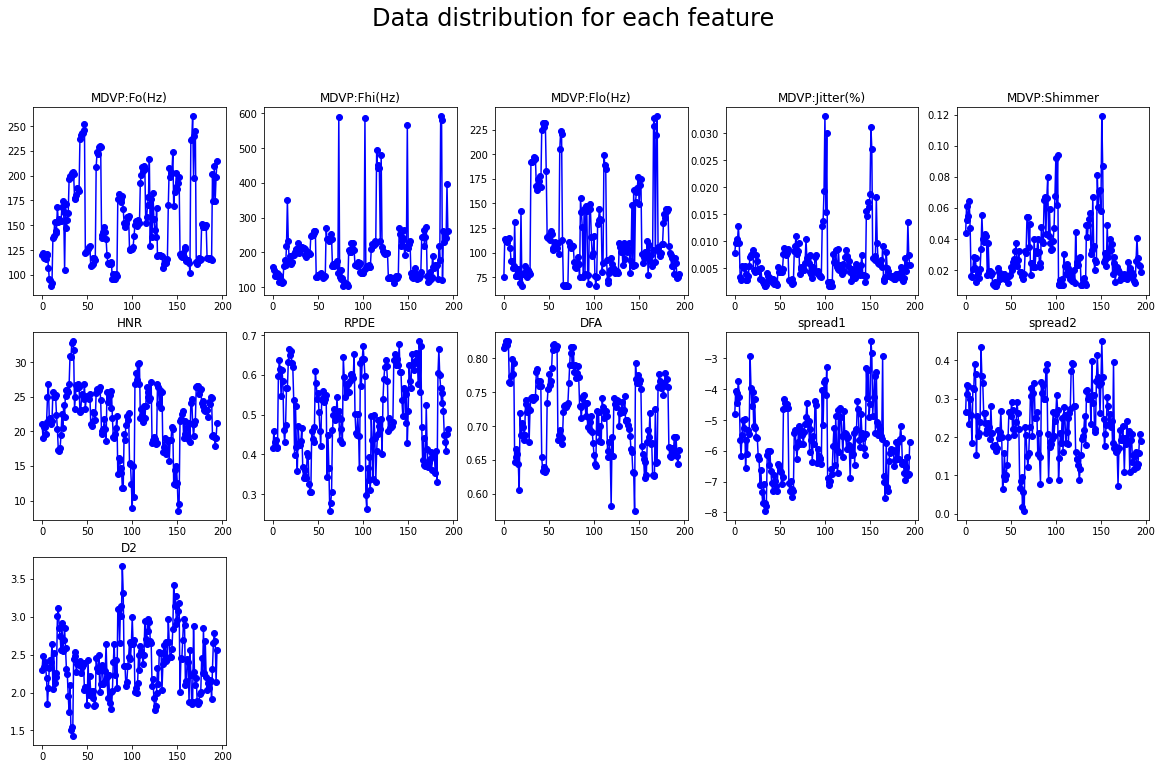

In [5]:
plt.figure(figsize = (20,20))

for i in range(1, num_features+1):
    plt.subplot(5,5,i)
    plt.plot(df_feature_dropped.iloc[:,i-1], 'bo-')
    plt.title(f'{df_feature_dropped.columns[i-1]}')

plt.suptitle ("Data distribution for each feature", y=0.95, fontsize=24)
plt.show ()

n_neighbors with minimum outliers: 7


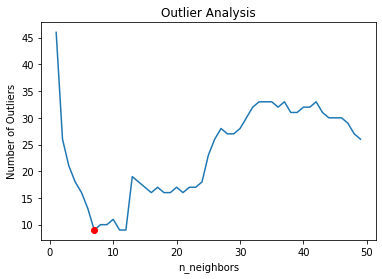

In [6]:
outlier_number = []
min_num_outlier = 1000 # placeholder for minimum n_neigh

for i in range(1,50):
    lof = LocalOutlierFactor(n_neighbors = i)
    outlier = lof.fit_predict(feature)

    num_outlier = len(outlier[outlier==-1])
    
    # added
    if num_outlier < min_num_outlier:
      min_num_outlier = num_outlier
      n_neigh = int(i)
    
    outlier_number += [num_outlier]

print (f"n_neighbors with minimum outliers: {n_neigh}")

plt.plot(range(1,50), outlier_number)
plt.plot(n_neigh, min(outlier_number), "ro")
plt.xlabel ("n_neighbors")
plt.ylabel ("Number of Outliers")
plt.title ("Outlier Analysis")
plt.show ()

We'll use *n_neighbors* that gives the minimum number of outliers.

In [7]:
# removing outliers from the dataset
lof = LocalOutlierFactor(n_neighbors = n_neigh)
outlier = lof.fit_predict(feature)
num_outlier = len(outlier[outlier == -1])

data_r = feature[outlier == 1] # data with outliers removed
label_r = label[outlier==1] # according labels



print(f"Using n_neighbors: {n_neigh}")
print(f"Minimum num_outlier: {num_outlier}")
print(f'Feature with dropped outliers: {data_r.shape}')

Using n_neighbors: 7
Minimum num_outlier: 9
Feature with dropped outliers: (186, 11)


## Standard Scaling

In [8]:
# numpy
x_data = data_r # (186, 11)
y_data = label_r # (186,)
print (x_data.shape, y_data.shape)

(186, 11) (186,)


In [9]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform (x_data)

print (f"Features are standard-scaled.")  # std-scaled X
print (f"Mean: {x_data_scaled.mean()}\nStandard deviation: {x_data_scaled.std()}")

Features are standard-scaled.
Mean: -8.091713461979635e-16
Standard deviation: 1.0


## PCA (to reduce noises)

In [10]:
pca = PCA(n_components = num_features)
x_pca = pca.fit_transform(x_data_scaled)

pca.explained_variance_ratio_

array([0.41602151, 0.19522756, 0.1072179 , 0.07417054, 0.06698089,
       0.04738628, 0.03192858, 0.02199359, 0.01719811, 0.01332466,
       0.00855036])

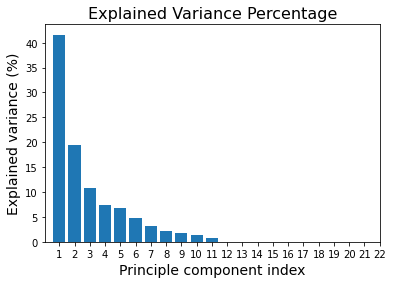

In [11]:
plt.bar (range(1,num_features+1), pca.explained_variance_ratio_*100) # percentage
plt.title ("Explained Variance Percentage", fontsize=16)
plt.xlabel ("Principle component index", fontsize=14)
plt.ylabel ("Explained variance (%)", fontsize=14)
plt.xticks (np.arange (1,23))
plt.show ()

In [12]:
print(f'{np.sum(pca.explained_variance_ratio_[0:8])*100:1.2f} % of features are explained using {len(pca.explained_variance_ratio_[0:8])} components.')

96.09 % of features are explained using 8 components.


In [13]:
pca = PCA (n_components = 8)
X_reduced = pca.fit_transform (x_data_scaled)

print (X_reduced.shape, y_data.shape) # dataset for ML

(186, 8) (186,)


### train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_data, test_size = 0.3, random_state = 924)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(130, 8) (56, 8) (130,) (56,)


# Different model tryouts

In [ ]:
names = ["K_Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "MLP", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="linear", C=1),
    SVC(kernel="poly", degree=3, C=1),
    SVC(kernel="rbf", C=1),
    GaussianProcessClassifier(max_iter_predict = 1000),
    GradientBoostingClassifier(n_estimators=100, learning_rate=0.1),
    DecisionTreeClassifier(max_depth=10),
    ExtraTreesClassifier(n_estimators=100),
    RandomForestClassifier(max_depth=10, n_estimators=100),
    MLPClassifier(hidden_layer_sizes = 100, solver = 'adam', alpha=0.0001, learning_rate_init = 0.001, max_iter=1000),
    AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### cross validation

In [ ]:
X_train_cols = ["PCA "+str(i+1) for i in range (X_train.shape[1])]

X_train_df = pd.DataFrame(X_train, columns=X_train_cols)

X_train_df

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8
0,-0.964652,-1.311057,0.897969,0.812375,-0.093963,-0.039405,0.212462,-0.562184
1,0.574901,-1.889501,0.330679,-0.506213,0.149833,-0.498701,0.312583,1.251121
2,3.278057,1.737230,2.030477,0.847334,-0.356127,-0.173101,-0.055511,0.108874
3,3.070202,1.130013,-2.244748,1.330666,-1.511086,0.333298,-1.283454,-0.138055
4,-0.043607,2.055266,-2.029207,1.591358,-1.728969,-0.395676,-1.070387,-0.957285
...,...,...,...,...,...,...,...,...
125,6.451061,1.633828,0.992896,-2.703798,0.961750,-0.372268,-1.966837,-0.240992
126,-1.356261,-0.347785,1.203540,0.227790,0.138352,-0.465389,0.066119,0.079906
127,-0.618230,1.076201,-0.929103,-0.740363,0.662056,-0.477956,0.832054,-0.554534
128,-0.194939,1.282421,-1.621467,-0.488900,-0.472829,-0.326099,0.339785,-0.270855


In [ ]:
kf = KFold (n_splits = 5)

j = 0
df = pd.DataFrame()

for train_idx, val_idx in kf.split(X_train, y_train):

  X_tr = X_train[train_idx]
  y_tr = y_train[train_idx]
  X_val = X_train[val_idx]
  y_val = y_train[val_idx]

  scores = []
  for name, clf in zip(names, classifiers):
      clf.fit(X_tr, y_tr);
      score = clf.score(X_val, y_val);
      scores.append(score);
  
  df[j] = scores
  j += 1

df_avg = pd.DataFrame()
df_avg['name'] = names
df_avg['score'] = df.mean(axis =1)
df_sorted = df_avg.sort_values('score', ascending=False)

df_sorted

,name,score
3,RBF_SVM,0.923077
0,K_Nearest_Neighbors,0.915385
4,Gaussian_Process,0.915385
1,Linear_SVM,0.884615
2,Polynomial_SVM,0.884615
11,Naive_Bayes,0.869231
9,MLP,0.869231
7,Extra_Trees,0.861538
8,Random_Forest,0.861538
10,AdaBoost,0.853846


**Chosen classification algorithms based on best score:**
- SVM
- K-Nearest Neighbors

**Note that MLP does not work very well with small sized datasets.**
- MLP

# SVM

### Hyperparameter Tuning

In [ ]:
X_train.shape, y_train.shape

((130, 8), (130,))

In [ ]:
svc = SVC()

# fitting with all combinations in param_grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],
               'kernel': ['rbf', 'linear','sigmoid','poly']}

svc_cv = GridSearchCV (svc, param_grid, n_jobs=3, cv=5)
svc_cv.fit (X_train, y_train)

print (f"Tuned hyperparameters: {svc_cv.best_params_}")
print (f"SVC Test accuracy: {svc_cv.score (X_test, y_test)}")

Tuned hyperparameters: {'C': 1, 'kernel': 'rbf'}
SVC Test accuracy: 0.8392857142857143


Through searching the grid of parameters and calculating the validation scores, the hyperparameters were tuned. For SVC, the regularization parameter ($C$) is determined to be $1.0$, and the kernel type was chosen to be *rbf* type.

Best SVC parameters through Grid Search CV: 
- $C = 1.0$
- kernel = "rbf"


$C$ can be further tuned using finer parameter grid.

In [ ]:

def svc_test (c, kernel:str):
  svc_model = SVC (C=c, kernel=kernel)
  svc_scores = cross_validate (estimator = svc_model,
                              X = X_train,
                              y = y_train,
                              scoring = ["accuracy", "f1", "roc_auc"],
                              cv=5)
    
  # test metrics
  mean_accuracy = svc_scores['test_accuracy'].mean()
  mean_f1 = svc_scores['test_f1'].mean()
  mean_roc = svc_scores['test_roc_auc'].mean()
  return mean_accuracy, mean_f1, mean_roc


kernel='rbf'
Clist = np.linspace (0.50, 2.00, 200)
accuracies = []
f1scores = []
rocauc = []

for c in Clist:
  mean_accuracy, mean_f1, mean_roc = svc_test (c, kernel)
  
  accuracies.append (mean_accuracy)
  f1scores.append (mean_f1)
  rocauc.append (mean_roc)


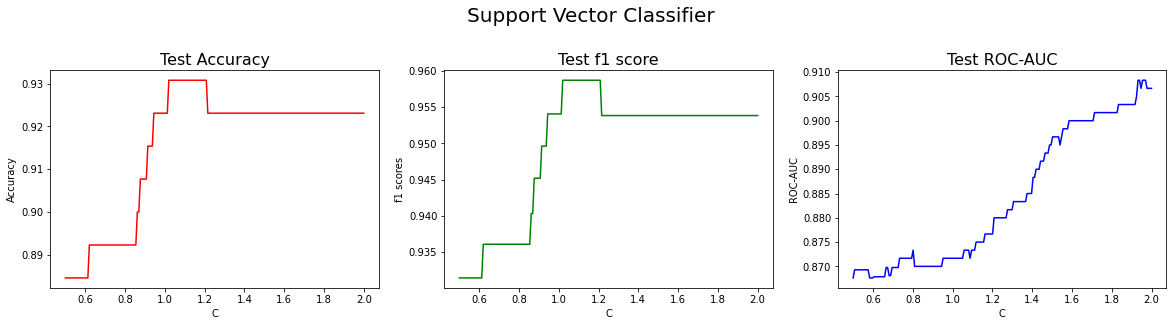

In [ ]:
fig,ax = plt.subplots (1,3, figsize=(20,4))
fig.suptitle ("Support Vector Classifier", y=1.1, fontsize=20)

ax[0].plot (Clist, accuracies, "r")
ax[0].set_xlabel ("C")
ax[0].set_ylabel ("Accuracy")
ax[0].set_title ("Test Accuracy",fontsize=16)

ax[1].plot (Clist, f1scores, "g")
ax[1].set_xlabel ("C")
ax[1].set_ylabel ("f1 scores")
ax[1].set_title ("Test f1 score",fontsize=16)

ax[2].plot (Clist, rocauc, "b")
ax[2].set_xlabel ("C")
ax[2].set_ylabel ("ROC-AUC")
ax[2].set_title ("Test ROC-AUC",fontsize=16) ;

Highest SVC test scores around $C=1.1$

### Final SVC model & evaluation

In [ ]:
# best param
C, kernel = 1.1, 'rbf'
mean_accuracy, mean_f1, mean_roc = svc_test (C, kernel)
svc_model = SVC (C=C, kernel=kernel)
svc_model.fit (X_train, y_train)

print (f"Tuned parameters: C={C}, kernel='{kernel}'")
print (f"SVC Test Accuracy: {mean_accuracy*100:1.7f} %")
print (f"SVC Test f1 score: {mean_f1*100:1.7f} %")
print (f"SVC Test ROC-AUC: {mean_roc*100:1.7f} %")

Tuned parameters: C=1.1, kernel='rbf'
SVC Test Accuracy: 93.0769231 %
SVC Test f1 score: 95.8730159 %
SVC Test ROC-AUC: 87.3333333 %


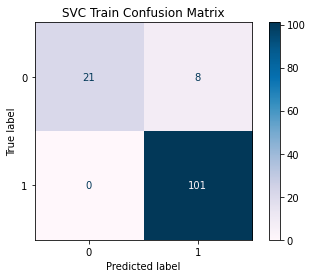

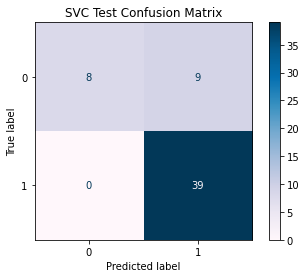

In [ ]:
# Confusion matrix (Trainset)
yhat_train = svc_model.predict (X_train)
yhat_test = svc_model.predict (X_test)

cm_train = confusion_matrix(y_train, yhat_train)
cm_test = confusion_matrix(y_test, yhat_test)

CM_train = ConfusionMatrixDisplay (cm_train)
CM_test = ConfusionMatrixDisplay (cm_test)


CM_train.plot(cmap="PuBu") # train
plt.title ("SVC Train Confusion Matrix")
plt.show ()

CM_test.plot(cmap="PuBu") # test
plt.title ("SVC Test Confusion Matrix")
plt.show ()

- **True Positive:** person with PD predicted correctly
- **True Negative:** person without PD predicted correctly

- **False Positive:** person without PD predicted as having PD
- **False Negative:** person with PD predicted as not having PD


Note that false negative is the most important metric in this case, because a testee having the Parkinson's disease should not be predicted healthy. The SVC predictions contained less or no false negatives for both train and test data sets. In other words, support vector classifier can be considered a strong candidate for this task.

# Multilayer Perceptron (MLP)

### Hyperparameter tuning

In [ ]:

mlp = MLPClassifier (tol=1e-6, max_iter=10000)


param_grid = {'activation': ['relu', 'tanh'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.1, 1.0]}

mlp_cv = GridSearchCV (mlp, param_grid, n_jobs=3, cv=5)

mlp_cv.fit (X_train, y_train)

print (mlp_cv.best_params_)
print (f"MLP test accuracy: {mlp_cv.score (X_test,y_test):1.4f}")

{'activation': 'relu', 'alpha': 1.0, 'solver': 'sgd'}
MLP test accuracy: 0.8571


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Through the hyperparameter tuning process shown above, the chosen hyperparameters for MLP were:

- activation = 'tanh'
- alpha = 1.0
- solver = 'adam'


In [17]:
def mlp_test (activation:str, alpha, solver:str):
  mlp_model = MLPClassifier (activation = activation, alpha=alpha, solver=solver, tol=1e-6, max_iter=10000)
  mlp_scores = cross_validate (estimator = mlp_model,
                              X = X_train,
                              y = y_train,
                              scoring = ["accuracy", "f1", "roc_auc"],
                              cv=5)
    
  # test metrics
  mean_accuracy = mlp_scores['test_accuracy'].mean()
  mean_f1 = mlp_scores['test_f1'].mean()
  mean_roc = mlp_scores['test_roc_auc'].mean()
  return mean_accuracy, mean_f1, mean_roc

# best param
activation = 'tanh'
alpha=1.0
solver='adam'

mean_accuracy, mean_f1, mean_roc = mlp_test (activation, alpha, solver)
mlp_model = MLPClassifier (activation = activation, alpha=alpha, solver=solver, tol=1e-6, max_iter=10000)
mlp_model.fit (X_train, y_train)

print (f"Tuned parameters: activation={activation}, alpha={alpha}, solver={solver}")
print (f"MLP Test Accuracy: {mean_accuracy*100:1.7f} %")
print (f"MLP Test f1 score: {mean_f1*100:1.7f} %")
print (f"MLP Test ROC-AUC: {mean_roc*100:1.7f} %")

Tuned parameters: activation=tanh, alpha=1.0, solver=adam
MLP Test Accuracy: 89.2307692 %
MLP Test f1 score: 93.2637065 %
MLP Test ROC-AUC: 95.5000000 %


MLP test score: 0.8750


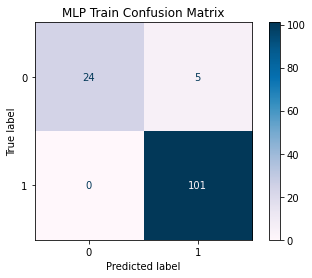

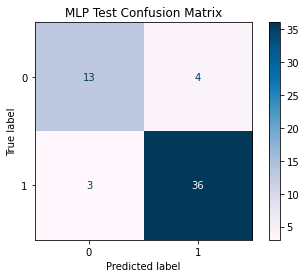

In [18]:
# Confusion matrix (Trainset)
yhat_train = mlp.predict (X_train)
yhat_test = mlp.predict (X_test)

cm_train = confusion_matrix(y_train, yhat_train)
cm_test = confusion_matrix(y_test, yhat_test)

CM_train = ConfusionMatrixDisplay (cm_train)
CM_test = ConfusionMatrixDisplay (cm_test)

print (f"MLP test score: {mlp.score (X_test, y_test):1.4f}")


CM_train.plot(cmap="PuBu") # train
plt.title ("MLP Train Confusion Matrix")
plt.show ()

CM_test.plot(cmap="PuBu") # test
plt.title ("MLP Test Confusion Matrix")
plt.show ()

# K-Nearest Neighbors Classifier

In [20]:
def knn_test (n_neighbors):
  knn = KNeighborsClassifier (n_neighbors=n_neighbors)
  knn_scores = cross_validate (estimator = knn,
                               X = X_train,
                               y = y_train,
                               scoring = ["accuracy", "f1", "roc_auc"],
                               cv=5)
  
  # test metrics
  mean_accuracy = knn_scores['test_accuracy'].mean()
  mean_f1 = knn_scores['test_f1'].mean()
  mean_roc = knn_scores['test_roc_auc'].mean()

  return mean_accuracy, mean_f1, mean_roc



Nlist = np.arange (1,30,1)
accuracies = []
f1scores = []
rocauc = []

for N in Nlist:
  mean_accuracy, mean_f1, mean_roc = knn_test (n_neighbors = N)
  
  # store N with highest f1 test score
  if N > 1 and mean_f1 > max (f1scores):
    n_neigh, max_f1 = N, mean_f1

  accuracies.append (mean_accuracy)
  f1scores.append (mean_f1)
  rocauc.append (mean_roc)


print (f"Tuned n_neighbors: {n_neigh}")
print (f"Test F1 score: {max_f1*100:1.3} %")

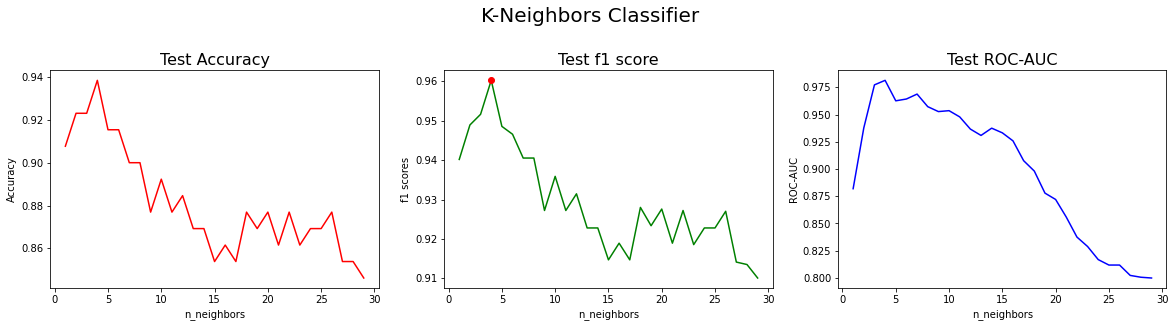

In [ ]:

fig,ax = plt.subplots (1,3, figsize=(20,4))
fig.suptitle ("K-Neighbors Classifier", y=1.1, fontsize=20)

ax[0].plot (Nlist, accuracies, "r")
ax[0].set_xlabel ("n_neighbors")
ax[0].set_ylabel ("Accuracy")
ax[0].set_title ("Test Accuracy",fontsize=16)

ax[1].plot (Nlist, f1scores, "g")
ax[1].plot (n_neigh, max_f1, "ro")
ax[1].set_xlabel ("n_neighbors")
ax[1].set_ylabel ("f1 scores")
ax[1].set_title ("Test f1 score",fontsize=16)

ax[2].plot (Nlist, rocauc, "b")
ax[2].set_xlabel ("n_neighbors")
ax[2].set_ylabel ("ROC-AUC")
ax[2].set_title ("Test ROC-AUC",fontsize=16) ;

In [22]:
# best param
n_neighbors = 4
mean_accuracy, mean_f1, mean_roc = knn_test (n_neighbors=n_neighbors)
knn_model = KNeighborsClassifier (n_neighbors=n_neighbors)
knn_model.fit (X_train, y_train)

print (f"Tuned parameters: n_neighbors={n_neighbors}")
print (f"KNN Test Accuracy: {mean_accuracy*100:1.7f} %")
print (f"KNN Test f1 score: {mean_f1*100:1.7f} %")
print (f"KNN Test ROC-AUC: {mean_roc*100:1.7f} %")

Tuned parameters: n_neighbors=4
KNN Test Accuracy: 93.8461538 %
KNN Test f1 score: 96.0231395 %
KNN Test ROC-AUC: 98.1428571 %


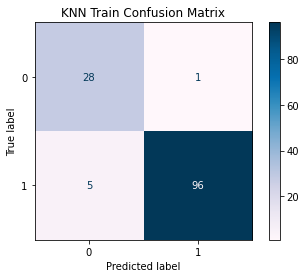

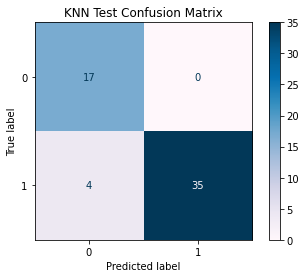

In [ ]:
# knn best
knn = KNeighborsClassifier (n_neighbors = n_neigh)
knn.fit (X_train, y_train)

# Confusion matrix (Trainset)
yhat_train = knn.predict (X_train)
yhat_test = knn.predict (X_test)

cm_train = confusion_matrix(y_train, yhat_train)
cm_test = confusion_matrix(y_test, yhat_test)

CM_train = ConfusionMatrixDisplay (cm_train)
CM_test = ConfusionMatrixDisplay (cm_test)


CM_train.plot(cmap="PuBu") # train
plt.title ("KNN Train Confusion Matrix")
plt.show ()

CM_test.plot(cmap="PuBu") # test
plt.title ("KNN Test Confusion Matrix")
plt.show ()

KNN with 4 neighbors provides the highest test metrics (F1 score). However, unlike support vector classifier, false negatives exist in both train and test cases. Choosing KNN for disease dianosis classification can be a concern regardless of the high test accuracy.

# Recall Ratio

The recall ratios were calculated to evaluate the false negatives better.

$Recall = \cfrac{TP}{TP+FN}$

In [23]:
recall_svc = 39/39
recall_knn = 35/39
recall_mlp = 36/39
print (f"SVC Recall: {recall_svc}")
print (f"KNN Recall: {recall_knn:1.4f}")
print (f"MLP Recall: {recall_mlp:1.4f}")

SVC Recall: 1.0
KNN Recall: 0.8974
MLP Recall: 0.9231


SVC ends up having recall rate of $1.0$ because it has no false negatives. In terms of recall, SVC is the better algorithm for this task over KNN.